### MULTICLASS CLASSIFICATION FOR METAL, CLASSICAL, BLUES, HIPHOP, POP AND REGGAE MUSIC GENRES


* First of all, let's import every library and our config.py and functions.py files to the notebook.

In [2]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain data from our dataset.

In [3]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.505871,-0.784343,-0.381517,-0.691296,-0.102910,0.360529,-0.190651,-0.573006,-0.236475,-0.455261,0.150419,-0.728578,-0.140822,-0.511144,0.270120,-0.537511,-0.122693,-0.540046,0.240140,-0.568890,-0.313805,-0.518352,0.453256,-0.208071,-0.084597,-0.399434,0.089506,-0.107586,-0.173155,-0.717649,0.381014,-0.822516,0.066922,-0.791601,0.243702,-0.605348,blues
1,-0.789556,-0.726759,-0.558508,-0.463546,-0.209252,0.284296,-0.140808,-0.414006,-0.331598,0.017991,0.084396,-0.610233,0.299126,-0.299229,0.244348,-0.365369,0.219427,-0.244144,0.314684,-0.472332,-0.002811,0.833599,0.659845,-0.054573,0.109569,0.305615,0.068288,0.107571,0.114338,-0.614191,0.466265,-0.768651,0.270741,-0.472923,0.290053,-0.540595,blues
2,-0.590099,-0.556617,-0.501110,-0.520622,0.116042,0.346714,-0.356500,-0.705253,-0.413321,-0.486681,0.280991,-0.315230,-0.168149,-0.476029,0.109377,-0.500733,-0.371639,-0.376638,0.383071,-0.459500,-0.258043,-0.012935,0.231027,0.403679,-0.069942,-0.573898,-0.142180,-0.164152,-0.352841,-0.666355,0.183758,-0.750733,-0.092969,-0.638534,-0.180121,-0.522839,blues
3,-0.943024,-0.920130,-0.872579,-0.740865,-0.066342,0.053195,-0.638890,-0.588218,-0.772109,-0.548263,0.489179,-0.577537,0.201451,-0.526268,-0.000605,-0.673602,0.260565,-0.484234,-0.010976,-0.516779,0.316538,-0.492199,0.247373,-0.412489,0.473851,-0.509886,-0.030843,-0.744359,0.293462,-0.777223,0.106823,-0.925347,0.203523,-0.837531,-0.113555,-0.705568,blues
4,-0.205440,-0.400993,-0.235703,-0.243991,0.192046,0.279441,-0.313278,-0.530764,-0.197442,-0.129653,0.066159,0.054104,-0.284188,-0.579960,-0.024513,-0.315013,-0.818206,-0.355501,0.124835,-0.179043,-0.572283,-0.055638,0.021444,0.292024,-0.208489,-0.063017,-0.253453,0.142063,-0.434093,-0.676305,-0.180319,-0.711424,0.166031,-0.221047,-0.366920,-0.275989,blues


* Let's split our dataset..
* Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [5]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.85,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (149, 37)
Test data size: (850, 37)


In [6]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Nearest Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network

* Application of KNN algorithm and its performance analysis

Max Accuracy is 0.436 on test dataset with 4 neighbors.

Training Score: 0.644
Test score: 0.436
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['jazz' 'metal' 'reggae' 'hiphop' 'jazz' 'reggae' 'country' 'pop' 'metal'
 'hiphop' 'hiphop' 'reggae' 'jazz' 'country' 'metal' 'reggae' 'classical'
 'rock' 'reggae' 'rock' 'country' 'metal' 'pop' 'classical' 'jazz'
 'classical' 'classical' 'disco' 'jazz' 'disco' 'hiphop' 'classical'
 'rock' 'blues' 'metal' 'classical' 'jazz' 'disco' 'hiphop' 'jazz' 'pop'
 'reggae' 'country' 'jazz' 'jazz' 'reggae' 'disco' 'reggae' 'metal'
 'classical' 'reggae' 'pop' 'hiphop' 'rock' 'blues' 'hiphop' 'reggae'
 'hiphop' 'hiphop' 'classical' 'reggae' 'country' 'reggae' 'rock' 'pop'
 'pop' 'pop' 'jazz' 'classical' 'hiphop' 'reggae' 'disco' 'disco' 'reggae'
 'country' 'metal' 'classical' 'metal' 'jazz' 'rock' 'blues' 'blues' 'pop'
 'hiphop' 'pop' 'reggae' 'metal' 'jazz' 'metal' 'blues' 'classical'
 'country' 'rock' 'disco

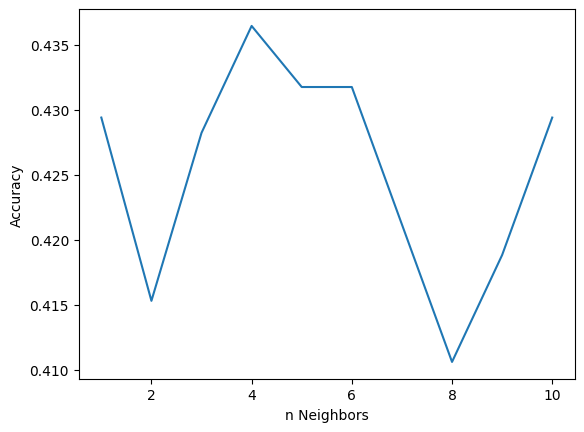

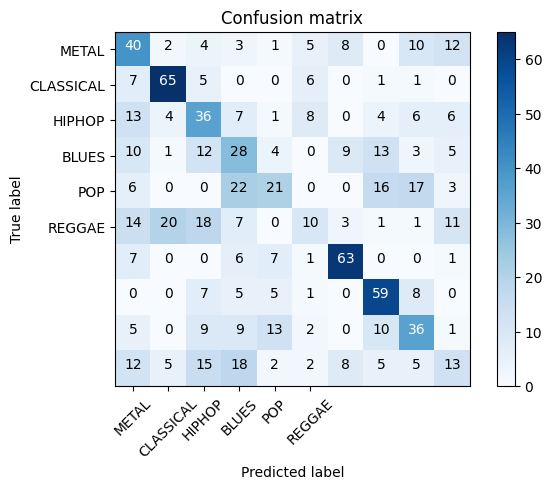

In [7]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

* Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.431 on test dataset with 16 estimators.

Training Score: 1.000
Test score: 0.431
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['jazz' 'metal' 'reggae' 'hiphop' 'jazz' 'reggae' 'country' 'pop' 'metal'
 'hiphop' 'hiphop' 'reggae' 'jazz' 'country' 'metal' 'reggae' 'classical'
 'rock' 'reggae' 'rock' 'country' 'metal' 'pop' 'classical' 'jazz'
 'classical' 'classical' 'disco' 'jazz' 'disco' 'hiphop' 'classical'
 'rock' 'blues' 'metal' 'classical' 'jazz' 'disco' 'hiphop' 'jazz' 'pop'
 'reggae' 'country' 'jazz' 'jazz' 'reggae' 'disco' 'reggae' 'metal'
 'classical' 'reggae' 'pop' 'hiphop' 'rock' 'blues' 'hiphop' 'reggae'
 'hiphop' 'hiphop' 'classical' 'reggae' 'country' 'reggae' 'rock' 'pop'
 'pop' 'pop' 'jazz' 'classical' 'hiphop' 'reggae' 'disco' 'disco' 'reggae'
 'country' 'metal' 'classical' 'metal' 'jazz' 'rock' 'blues' 'blues' 'pop'
 'hiphop' 'pop' 'reggae' 'metal' 'jazz' 'metal' 'blues' 'classical'
 'country' 'rock' 'dis

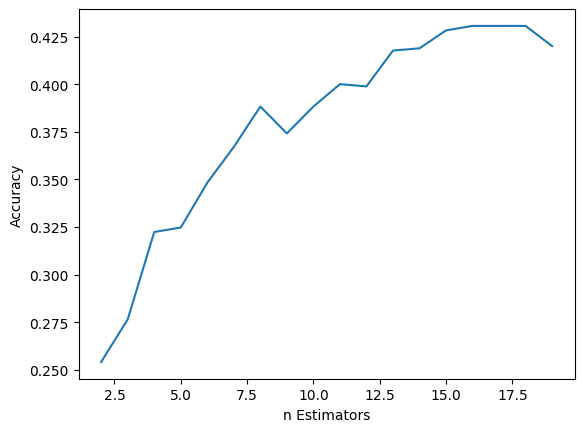

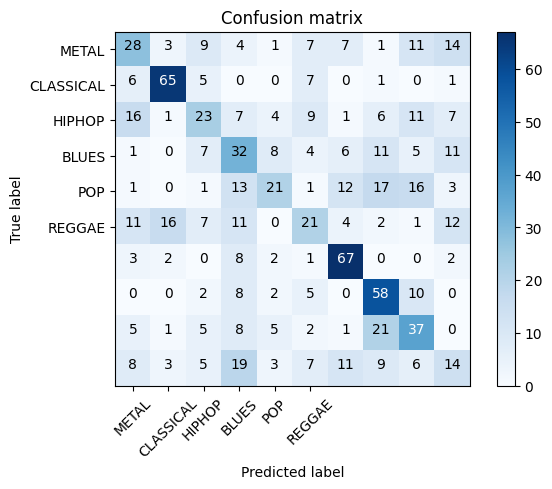

In [ ]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

* Application of SVM algorithm and its performance analysis

Training Score: 1.000
Test score: 0.502
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['jazz' 'metal' 'reggae' 'hiphop' 'jazz' 'reggae' 'country' 'pop' 'metal'
 'hiphop' 'hiphop' 'reggae' 'jazz' 'country' 'metal' 'reggae' 'classical'
 'rock' 'reggae' 'rock' 'country' 'metal' 'pop' 'classical' 'jazz'
 'classical' 'classical' 'disco' 'jazz' 'disco' 'hiphop' 'classical'
 'rock' 'blues' 'metal' 'classical' 'jazz' 'disco' 'hiphop' 'jazz' 'pop'
 'reggae' 'country' 'jazz' 'jazz' 'reggae' 'disco' 'reggae' 'metal'
 'classical' 'reggae' 'pop' 'hiphop' 'rock' 'blues' 'hiphop' 'reggae'
 'hiphop' 'hiphop' 'classical' 'reggae' 'country' 'reggae' 'rock' 'pop'
 'pop' 'pop' 'jazz' 'classical' 'hiphop' 'reggae' 'disco' 'disco' 'reggae'
 'country' 'metal' 'classical' 'metal' 'jazz' 'rock' 'blues' 'blues' 'pop'
 'hiphop' 'pop' 'reggae' 'metal' 'jazz' 'metal' 'blues' 'classical'
 'country' 'rock' 'disco' 'pop' 'rock' 'pop' 'classical' 'jazz' 'metal'
 'classic

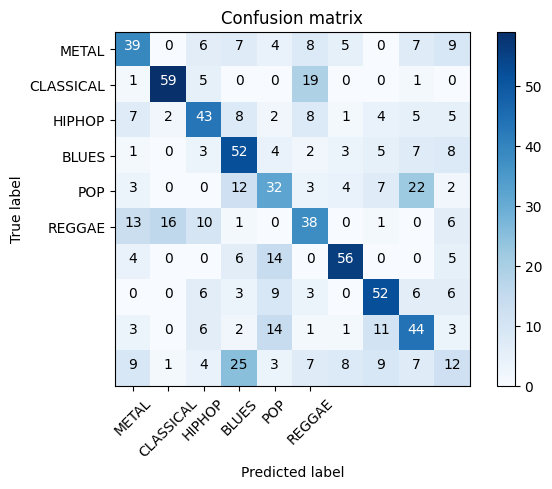

In [24]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)

* Application of Neural Network algorithm and its performance analysis

c:\Users\vanh\Music-Genre-Classification\Music-Genre-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Score: 1.000
Test score: 0.500
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['jazz' 'metal' 'reggae' 'hiphop' 'jazz' 'reggae' 'country' 'pop' 'metal'
 'hiphop' 'hiphop' 'reggae' 'jazz' 'country' 'metal' 'reggae' 'classical'
 'rock' 'reggae' 'rock' 'country' 'metal' 'pop' 'classical' 'jazz'
 'classical' 'classical' 'disco' 'jazz' 'disco' 'hiphop' 'classical'
 'rock' 'blues' 'metal' 'classical' 'jazz' 'disco' 'hiphop' 'jazz' 'pop'
 'reggae' 'country' 'jazz' 'jazz' 'reggae' 'disco' 'reggae' 'metal'
 'classical' 'reggae' 'pop' 'hiphop' 'rock' 'blues' 'hiphop' 'reggae'
 'hiphop' 'hiphop' 'classical' 'reggae' 'country' 'reggae' 'rock' 'pop'
 'pop' 'pop' 'jazz' 'classical' 'hiphop' 'reggae' 'disco' 'disco' 'reggae'
 'country' 'metal' 'classical' 'metal' 'jazz' 'rock' 'blues' 'blues' 'pop'
 'hiphop' 'pop' 'reggae' 'metal' 'jazz' 'metal' 'blues' 'classical'
 'country' 'rock' 'disco' 'pop' 'rock' 'pop' 'classical' 'jazz' 'metal'
 'classic

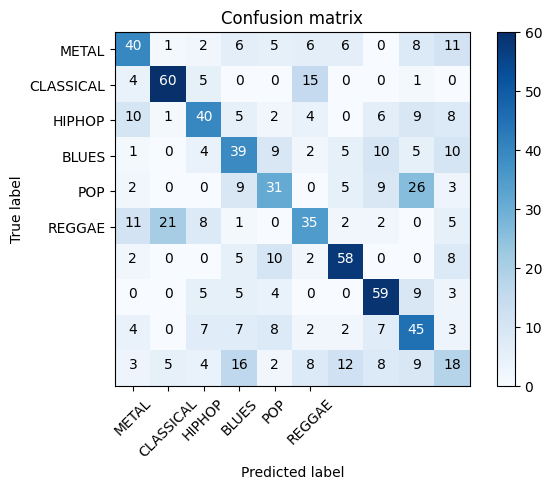

In [11]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)

Kết luận từ Notebook
Notebook này là một ví dụ điển hình về việc so sánh hiệu suất của nhiều thuật toán phân loại khác nhau trên cùng một bộ dữ liệu. 
Dựa trên kết quả, mô hình SVM (Support Vector Machine) cho hiệu suất tốt nhất trên tập dữ liệu kiểm tra với độ chính xác là 70%. 
Các mô hình khác cũng cho kết quả khá tốt (65-67%).